# Project: Analysis of "WeRateDogs" Twitter Dataset

# Table of Contents


- [Introduction](#intro)
- [Data Wrangling](#wrangling)
    - [Gather](#gather)
    - [Assess](#assess) 
    - [Clean](#clean)
    - [Store](#store)
- [Exploratory Data Analysis](#eda)

<a id='intro'></a>
# 1. Introduction

> WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog [(Wikipedia)](https://en.wikipedia.org/wiki/WeRateDogs). While the primary purpose of this project is to demonstrate and practice "Data Wrangling" using data from the Twitter archive of WeRateDogs, a few units of energy is also spent on exploratory data analysis.  <br/>
<br/>
The Data. This project requires three datasets from different sources. The first being WeRateDogs Twitter archive which was downloaded manually and contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets, but not everything. Of the 5000+ tweets, Udacity filtered for tweets with ratings only (2356). Second, a tsv file downloaded programmatically from Udacity servers which contains predictions of images from WeRateDogs Twitter archive. And lastly, Twitter API. Additional data such as "retweet count" is gathered from the Twitter API. 
<br/>
<br/>
This project is intended to help get acquainted with the Data Wrangling process and some common libraries, modules and functions which are used to wrangle data. The process is summarized below
>- downloading files programmatically and manually from different sources by using request library, querying twitter API etc.
>- documenting all issues related to data quality or tidiness  
>- cleaning all issues and testing if they are resolved. Functions like "assert" or pandas inbuilt functions are used for this purpose.

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import tweepy
import json
%matplotlib inline

<a id='wrangling'></a>

# 2. Data Wrangling

> Data Wrangling process can be lengthy. Hence, the process has been split into three stages for easier documentation and analysis:
>- **Gather:** All three datasets which are required to complete the project are imported into our workspace.
>- **Assess:** Here, we assess the quality and tidiness of our datasets by checking their completeness, validity, accuracy and consistency.
>- **Clean:** This step is further divided into three steps: **Define**, **Code** and **Test**. All data quality or tidiness issues, if any, are further documented, cleaned and tested

<a id='gather'></a>

## 2.1 Gather

In [118]:
# import the first dataset into our workspace
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [119]:
# download the second dataset, tweet image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join('image-predictions.tsv'), 'wb') as file:
    file.write(response.content)

In [120]:
image_predictions = pd.read_csv('image-predictions.tsv', delimiter='\t')

In [121]:
# create an API object
consumer_key = 'vKNp***m06'
consumer_secret = 'eF***C49'
access_token = '14***Uho'
access_secret = '28po***09GD'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
# gather the necessary attributes and store them in a file
missing_tweets_id = []

for tweet_id in twitter_archive.tweet_id:
    try:
        tweet = api.get_status(tweet_id)
        with open(os.path.join('tweet_json.txt'), mode='a+') as file:
            dictionary = {
                    'tweet_id': tweet.id,
                    'retweet_count': tweet.retweet_count, 
                    'favorite_count': tweet.favorite_count,
                    'tweet_month': tweet.created_at.month,
                    'tweet_year': tweet.created_at.year
                         }
            json.dump(dictionary, file)
            file.write('\n')
            print('successful', tweet_id)
    except Exception:
        missing_tweets_id.append(tweet_id) 
        print('failed', tweet_id)

successful 892420643555336193
successful 892177421306343426
successful 891815181378084864
successful 891689557279858688
successful 891327558926688256
successful 891087950875897856
successful 890971913173991426
successful 890729181411237888
successful 890609185150312448
successful 890240255349198849
successful 890006608113172480
successful 889880896479866881
successful 889665388333682689
successful 889638837579907072
successful 889531135344209921
successful 889278841981685760
successful 888917238123831296
successful 888804989199671297
successful 888554962724278272
failed 888202515573088257
successful 888078434458587136
successful 887705289381826560
successful 887517139158093824
successful 887473957103951883
successful 887343217045368832
successful 887101392804085760
successful 886983233522544640
successful 886736880519319552
successful 886680336477933568
successful 886366144734445568
successful 886267009285017600
successful 886258384151887873
successful 886054160059072513
successful 885

successful 840696689258311684
successful 840632337062862849
successful 840370681858686976
successful 840268004936019968
successful 839990271299457024
successful 839549326359670784
successful 839290600511926273
successful 839239871831150596
successful 838952994649550848
successful 838921590096166913
successful 838916489579200512
successful 838831947270979586
successful 838561493054533637
successful 838476387338051585
successful 838201503651401729
successful 838150277551247360
successful 838085839343206401
successful 838083903487373313
successful 837820167694528512
successful 837482249356513284
successful 837471256429613056
failed 837366284874571778
successful 837110210464448512
failed 837012587749474308
successful 836989968035819520
successful 836753516572119041
successful 836677758902222849
successful 836648853927522308
successful 836397794269200385
successful 836380477523124226
successful 836260088725786625
successful 836001077879255040
successful 835685285446955009
successful 8355745

successful 805207613751304193
successful 804738756058218496
successful 804475857670639616
successful 804413760345620481
successful 804026241225523202
successful 803773340896923648
successful 803692223237865472
successful 803638050916102144
successful 803380650405482500
successful 803321560782307329
successful 803276597545603072
successful 802952499103731712
successful 802624713319034886
successful 802600418706604034
successful 802572683846291456
successful 802323869084381190
successful 802265048156610565
failed 802247111496568832
successful 802239329049477120
successful 802185808107208704
successful 801958328846974976
successful 801854953262350336
successful 801538201127157760
successful 801285448605831168
successful 801167903437357056
successful 801127390143516673
successful 801115127852503040
successful 800859414831898624
successful 800855607700029440
successful 800751577355128832
successful 800513324630806528
successful 800459316964663297
successful 800443802682937345
successful 800

successful 770069151037685760
successful 769940425801170949
successful 769695466921623552
successful 769335591808995329
successful 769212283578875904
successful 768970937022709760
successful 768909767477751808
successful 768855141948723200
successful 768609597686943744
successful 768596291618299904
successful 768554158521745409
successful 768473857036525572
successful 768193404517830656
successful 767884188863397888
successful 767754930266464257
successful 767500508068192258
successful 767191397493538821
successful 767122157629476866
failed 766864461642756096
successful 766793450729734144
successful 766714921925144576
successful 766693177336135680
successful 766423258543644672
successful 766313316352462849
successful 766078092750233600
successful 766069199026450432
successful 766008592277377025
successful 765719909049503744
successful 765669560888528897
successful 765395769549590528
successful 765371061932261376
successful 765222098633691136
successful 764857477905154048
successful 764

successful 736225175608430592
successful 736010884653420544
successful 735991953473572864
successful 735648611367784448
successful 735635087207878657
successful 735274964362878976
successful 735256018284875776
successful 735137028879360001
successful 734912297295085568
successful 734787690684657664
successful 734776360183431168
successful 734559631394082816
successful 733828123016450049
successful 733822306246479872
successful 733482008106668032
successful 733460102733135873
successful 733109485275860992
successful 732732193018155009
successful 732726085725589504
successful 732585889486888962
successful 732375214819057664
successful 732005617171337216
successful 731285275100512256
successful 731156023742988288
successful 730924654643314689
successful 730573383004487680
successful 730427201120833536
successful 730211855403241472
successful 730196704625098752
successful 729854734790754305
successful 729838605770891264
successful 729823566028484608
successful 729463711119904772
successful

successful 702276748847800320
successful 702217446468493312
successful 701981390485725185
successful 701952816642965504
successful 701889187134500865
successful 701805642395348998
successful 701601587219795968
successful 701570477911896070
successful 701545186879471618
successful 701214700881756160
successful 700890391244103680
successful 700864154249383937
successful 700847567345688576
successful 700796979434098688
successful 700747788515020802
successful 700518061187723268
successful 700505138482569216
successful 700462010979500032
successful 700167517596164096
successful 700151421916807169
successful 700143752053182464
successful 700062718104104960
successful 700029284593901568
successful 700002074055016451
successful 699801817392291840
successful 699788877217865730
successful 699779630832685056
successful 699775878809702401
successful 699691744225525762
successful 699446877801091073
successful 699434518667751424
successful 699423671849451520
successful 699413908797464576
successful

successful 683849932751646720
successful 683834909291606017
successful 683828599284170753
successful 683773439333797890
successful 683742671509258241
successful 683515932363329536
successful 683498322573824003
successful 683481228088049664
successful 683462770029932544
successful 683449695444799489
successful 683391852557561860
successful 683357973142474752
successful 683142553609318400
successful 683111407806746624
successful 683098815881154561
successful 683078886620553216
successful 683030066213818368
successful 682962037429899265
successful 682808988178739200
successful 682788441537560576
successful 682750546109968385
successful 682697186228989953
successful 682662431982772225
successful 682638830361513985
successful 682429480204398592
successful 682406705142087680
successful 682393905736888321
successful 682389078323662849
successful 682303737705140231
successful 682259524040966145
successful 682242692827447297
successful 682088079302213632
successful 682059653698686977
successful

successful 674269164442398721
successful 674265582246694913
successful 674262580978937856
successful 674255168825880576
successful 674082852460433408
successful 674075285688614912
successful 674063288070742018
successful 674053186244734976
successful 674051556661161984
successful 674045139690631169
successful 674042553264685056
successful 674038233588723717
successful 674036086168010753
successful 674024893172875264
successful 674019345211760640
successful 674014384960745472
successful 674008982932058114
successful 673956914389192708
successful 673919437611909120
successful 673906403526995968
successful 673887867907739649
successful 673716320723169284
successful 673715861853720576
successful 673711475735838725
successful 673709992831262724
successful 673708611235921920
successful 673707060090052608
successful 673705679337693185
successful 673700254269775872
successful 673697980713705472
successful 673689733134946305
successful 673688752737402881
successful 673686845050527744
successful

successful 668902994700836864
successful 668892474547511297
successful 668872652652679168
successful 668852170888998912
successful 668826086256599040
successful 668815180734689280
successful 668779399630725120
successful 668655139528511488
successful 668645506898350081
successful 668643542311546881
successful 668641109086707712
successful 668636665813057536
successful 668633411083464705
successful 668631377374486528
successful 668627278264475648
successful 668625577880875008
successful 668623201287675904
successful 668620235289837568
successful 668614819948453888
successful 668587383441514497
successful 668567822092664832
successful 668544745690562560
successful 668542336805281792
successful 668537837512433665
successful 668528771708952576
successful 668507509523615744
successful 668496999348633600
successful 668484198282485761
successful 668480044826800133
successful 668466899341221888
successful 668297328638447616
successful 668291999406125056
successful 668286279830867968
successful

In [122]:
# read 'tweet_json.txt' into a pandas dataframe
additional_attributes = pd.read_json('tweet_json.txt', lines=True)

<a id='assess'></a>

## 2.2 Assess

In [123]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [124]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [125]:
additional_attributes

,tweet_id,retweet_count,favorite_count,tweet_month,tweet_year
0,892420643555336193,7009,33812,8,2017
1,892177421306343426,5302,29329,8,2017
2,891815181378084864,3481,22055,7,2017
3,891689557279858688,7227,36938,7,2017
4,891327558926688256,7762,35310,7,2017
...,...,...,...,...,...
2322,666049248165822465,37,89,11,2015
2323,666044226329800704,115,247,11,2015
2324,666033412701032449,36,100,11,2015
2325,666029285002620928,39,112,11,2015


In [126]:
sum(twitter_archive.tweet_id.duplicated())

0

In [127]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [128]:
sum(twitter_archive.in_reply_to_status_id.isnull())

2278

In [129]:
sum(twitter_archive.in_reply_to_user_id.isnull())

2278

In [130]:
sum(twitter_archive.retweeted_status_id.isnull())

2175

In [131]:
sum(twitter_archive.retweeted_status_user_id.isnull())

2175

In [132]:
sum(twitter_archive.retweeted_status_timestamp.isnull())

2175

In [133]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1262,710140971284037632,NaN,NaN,2016-03-16 16:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tater. His underbite is fierce af. Doe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710140971...,8,10,Tater,None,None,None,None
726,782598640137187329,NaN,NaN,2016-10-02 15:10:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timmy. He's quite large. According to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782598640...,11,10,Timmy,None,None,None,None
1937,673919437611909120,NaN,NaN,2015-12-07 17:38:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Obie. He is on guard watching for evil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673919437...,11,10,Obie,None,None,pupper,None
842,766793450729734144,NaN,NaN,2016-08-20 00:26:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rufus. He just missed out on the 100m ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766793450...,10,10,Rufus,None,None,None,None
677,789280767834746880,NaN,NaN,2016-10-21 01:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Meyer. He has to hold s...,7.507196e+17,4.196984e+09,2016-07-06 15:54:42 +0000,https://twitter.com/dog_rates/status/750719632...,12,10,Meyer,None,None,None,None
367,828770345708580865,NaN,NaN,2017-02-07 01:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. He's your Lyft for tonight. Kin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828770345...,13,10,Alfie,None,None,None,None
2297,667073648344346624,NaN,NaN,2015-11-18 20:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is Dave. He is actually just a skinny leg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667073648...,10,10,Dave,None,None,None,None
2002,672481316919734272,NaN,NaN,2015-12-03 18:23:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,None,None,pupper,None
231,847971574464610304,NaN,NaN,2017-04-01 00:39:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @basic_vacek_: I love my new mug easy 13/10...,8.479710e+17,5.970642e+08,2017-04-01 00:36:55 +0000,https://twitter.com/basic_vacek_/status/847971...,13,10,None,None,None,None,None
2143,669970042633789440,NaN,NaN,2015-11-26 20:04:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Julio. He was one of the original Ring...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669970042...,10,10,Julio,None,None,None,None


In [134]:
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [135]:
twitter_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [137]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [138]:
additional_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
 3   tweet_month     2327 non-null   int64
 4   tweet_year      2327 non-null   int64
dtypes: int64(5)
memory usage: 91.0 KB


### 2.2.1 Quality issues

#### ```twitter_archive``` table
- enormous missing value in the following columns:   
```retweeted_status_id```, ```retweeted_status_user_id	```, ```retweeted_status_id```, ```name```  
```in_reply_to_user_id``` and ```in_reply_to_status_id``` (**can't clean**)      
- ```in_reply_to_status_id``` and ```in_reply_to_user_id``` datatype should be string not float
- incorrect dog names
- few tweets have been deleted
- retweets are included
- invalid ratings are present in the dataset
- some tweet ids do not have images

#### ```image_predictions.tsv``` table
- inconsistent dog-breed-name cases in ```p1```, ```p2``` and ```p3``` columns

#### ```tweet_json.txt``` table
- incomplete data (**can't clean**)

### 2.2.2 Tidiness issues
- ```additional_attributes``` should be part of ```twitter_archive``` table
- column headers are values, not variable names in ```twitter_archive``` table
- Year and Month duplicated in twitter_archive and tweet_json.txt tables
- multiple dog stages name in a single row e.g. ```tweet_id``` 733109485275860992 and few others

<a id='clean' ></a>
## 2.3 Clean

In [183]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
additional_attributes_clean = additional_attributes.copy()

In [184]:
twitter_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

## Quality issues

### 2.3.1 Missing and Incomplete Data

**```twitter_archive```**  

#### ***Define***

According to the project specification, we only want original ratings (no retweets) that have images. Thus, we do not need attributes related to retweets. We therefore drop the following columns: ```retweeted_status_id```, ```retweeted_status_user_id``` and ```retweeted_status_timestamp```.

#### ***Code***

In [185]:
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### ***Test***

In [186]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### 2.3.2 Erroneous Datatype

**```twitter_archive```**  

#### ***Define***
Change ```in_reply_to_user_id``` and ```in_reply_to_status_id``` datatypes to string

#### ***Code***

In [187]:
twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean.in_reply_to_status_id.astype(str)
twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean.in_reply_to_user_id.astype(str)

In [188]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tweet_id               2356 non-null   int64 
 1   in_reply_to_status_id  2356 non-null   object
 2   in_reply_to_user_id    2356 non-null   object
 3   timestamp              2356 non-null   object
 4   source                 2356 non-null   object
 5   text                   2356 non-null   object
 6   expanded_urls          2297 non-null   object
 7   rating_numerator       2356 non-null   int64 
 8   rating_denominator     2356 non-null   int64 
 9   name                   2356 non-null   object
 10  doggo                  2356 non-null   object
 11  floofer                2356 non-null   object
 12  pupper                 2356 non-null   object
 13  puppo                  2356 non-null   object
dtypes: int64(3), object(11)
memory usage: 257.8+ KB


### 2.3.3 Incorrect dog names

**```twitter_archive```**  

#### ***Define***
It's obvious that some dog names such as 'a', 'quite', 'not', 'one', 'an', 'very', 'my', 'actually', 'this', 'old', 'the', 'by', 'officially' etc. are not correct. This is probably because the data was extracted programmatically and all tweets text do not follow the same pattern (**'This is...'**). 
Furthermore, a special case to note is the dog named 'O'.

**Replace all invalid dog names with 'None'**

#### ***Code***

In [189]:
invalid_dog_names = [name for name in twitter_archive_clean.name.unique() if name.islower()]

In [190]:
invalid_dog_names

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [191]:
# store all invalid dog names indices in a list
invalid_dog_names_index = []
for dog_name in invalid_dog_names:
    for index in twitter_archive_clean[twitter_archive_clean.name == dog_name].index:
        invalid_dog_names_index.append(index)

In [192]:
# replace all invalid dog names with 'None'
for index in invalid_dog_names_index:
    twitter_archive_clean.loc[index, 'name'] = None

In [193]:
# dog with the name 'O'
twitter_archive_clean.query('name == "O"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,nan,nan,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


In [194]:
twitter_archive_clean.query('name == "O"').text.values[0] # actual name is O'Malley

"This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC"

In [195]:
# replace the dog's name with the correct one (O'Malley)
twitter_archive_clean.loc[775, 'name'] = "O'Malley"

#### ***Test***

In [196]:
[name for name in twitter_archive_clean.name.unique() if name != None and name.islower()]

[]

In [197]:
assert twitter_archive_clean.loc[775]['name'] != 'O' 

## Tidiness issues

### 2.3.4 Merge Dataframes

#### ***Define***

Merge ```twitter_archive``` and ```additional_attributes``` tables into a single dataframe 

#### ***Code***

In [198]:
twitter_archive_clean = pd.merge(twitter_archive_clean, additional_attributes_clean)

#### ***Test***

In [199]:
twitter_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,tweet_month,tweet_year
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,7009,33812,8,2017
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,5302,29329,8,2017
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,3481,22055,7,2017


## Quality issues

### 2.3.5 Deleted Tweets

**```twitter_archive```**  

#### ***Define***

When [gathering](#gather) the third dataset, some tweets probably have been deleted (stored in ```missing_tweets_id```). This tweets can be excluded from our analysis or visualization by deleting them.

#### ***Code***

**Note: When we merged the two dataframes above, this issue was automatically fixed**

### 2.3.6 Drop Retweets

**```twitter_archive```**  

#### ***Define***
According to the project specifications, retweets are not to be included. Hence, drop all retweets. 

#### ***Code***

In [200]:
retweets = twitter_archive_clean[twitter_archive_clean.text.str.startswith('RT')]
retweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,tweet_month,tweet_year
31,886054160059072513,nan,nan,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None,93,0,7,2017
35,885311592912609280,nan,nan,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None,15442,0,7,2017
67,879130579576475649,nan,nan,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None,5742,0,6,2017
72,878404777348136964,nan,nan,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None,1078,0,6,2017
73,878316110768087041,nan,nan,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None,5529,0,6,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,711998809858043904,nan,nan,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None,122,0,3,2016
1258,708400866336894977,nan,nan,2016-03-11 21:15:02 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",RT if you are as ready for summer as this pup ...,https://vine.co/v/iHFqnjKVbIQ,12,10,None,None,None,None,None,9096,14705,3,2016
1831,675489971617296384,nan,nan,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None,528,1156,12,2015
2230,667550904950915073,nan,nan,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None,29,0,11,2015


In [201]:
twitter_archive_clean.drop(retweets.index, inplace=True)

#### ***Test***

In [202]:
twitter_archive_clean[twitter_archive_clean.text.str.startswith('RT')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,tweet_month,tweet_year


### 2.3.7 Just Few Invalid Ratings

**```twitter_archive```**  

**Note: Because there are probably a lot of invalid ratings, and cleaning all would require a lot of time, there is no 100 percent guarantee that all quality issues in these columns will be addressed after cleaning the issues below. Hence, I do not use these columns for analysis or visualization.**

- some dog ratings should be decimal numbers
- change the rating of the tweet with tweet_id 835246439529840640
- tweet with tweet_id 832088576586297345 should have no rating (**drop**)   

#### Decimal dog ratings

#### ***Define***
Change all tweets with decimal ratings to their corresponding valid ratings

#### ***Code***

In [203]:
# decimal ratings
decimal_ratings = twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]
decimal_ratings 

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator,rating_denominator
44,This is Bella. She hopes her smile made you sm...,5,10
675,"This is Logan, the Chow who lived. He solemnly...",75,10
742,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
1661,I've been told there's a slight possibility he...,5,10
1684,Here we have uncovered an entire battalion of ...,26,10


In [204]:
# one of the decimal tweets
twitter_archive_clean.loc[44].text

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [205]:
# replace corresponding tweets
decimal_ratings_ids = [i for i in decimal_ratings.index]
valid_ratings = [13.5, 9.75, 11.27, 9.5, 11.26]

for index, val in zip(decimal_ratings_ids, valid_ratings):
    twitter_archive_clean.loc[index, 'rating_numerator'] = val

#### ***Test***

In [206]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator,rating_denominator
44,This is Bella. She hopes her smile made you sm...,13.50,10
675,"This is Logan, the Chow who lived. He solemnly...",9.75,10
742,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10
1661,I've been told there's a slight possibility he...,9.50,10
1684,Here we have uncovered an entire battalion of ...,11.26,10


#### **Invalid rating**

#### **Define**
change the rating of the tweet with tweet_id 835246439529840640

##### **Code**

In [207]:
twitter_archive_clean.query('tweet_id == 835246439529840640')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,tweet_month,tweet_year
297,835246439529840640,8.35245984028504e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960.0,0,None,None,None,None,None,63,1992,2,2017


In [208]:
twitter_archive_clean.query('tweet_id == 835246439529840640').text.values[0]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [209]:
twitter_archive_clean.loc[297, 'rating_numerator'] = 13
twitter_archive_clean.loc[297, 'rating_denominator'] = 10

#### ***Test***

In [210]:
twitter_archive_clean.query('tweet_id == 835246439529840640')[['tweet_id', 'rating_numerator', 'rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
297,835246439529840640,13.0,10


#### Delete row with invalid rating

#### **Define**

drop tweet with tweet_id 832088576586297345

In [215]:
twitter_archive_clean.query('tweet_id == 832088576586297345')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,tweet_month,tweet_year
326,832088576586297345,8.320875475599974e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,11.0,15,None,None,None,None,None,2,59,2,2017


In [216]:
twitter_archive_clean.query('tweet_id == 832088576586297345').text.values[0]

'@docmisterio account started on 11/15/15'

In [217]:
twitter_archive_clean.drop(326, inplace=True)

#### ***Test***

In [218]:
twitter_archive_clean.query('tweet_id == 832088576586297345')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,tweet_month,tweet_year


In [221]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 0 to 2326
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2164 non-null   int64  
 1   in_reply_to_status_id  2164 non-null   object 
 2   in_reply_to_user_id    2164 non-null   object 
 3   timestamp              2164 non-null   object 
 4   source                 2164 non-null   object 
 5   text                   2164 non-null   object 
 6   expanded_urls          2107 non-null   object 
 7   rating_numerator       2164 non-null   float64
 8   rating_denominator     2164 non-null   int64  
 9   name                   2060 non-null   object 
 10  doggo                  2164 non-null   object 
 11  floofer                2164 non-null   object 
 12  pupper                 2164 non-null   object 
 13  puppo                  2164 non-null   object 
 14  retweet_count          2164 non-null   int64  
 15  favo

### 2.3.8 Some tweet ids do not have images

**```tweet_archive```** 

#### ***Define***
Delete all tweets that do not have images. i.e. delete all rows with tweet ids which are not in ```image_predictions```

#### ***Code***

In [222]:
no_image = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(image_predictions_clean.tweet_id)]
no_image

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,tweet_month,tweet_year
29,886267009285017600,8.862663570751283e+17,2281181600.0,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12.0,10,None,None,None,None,None,4,105,7,2017
34,885518971528720385,nan,nan,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,https://twitter.com/4bonds2carbon/status/88551...,14.0,10,None,None,None,None,None,3108,18007,7,2017
41,884247878851493888,nan,nan,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,https://twitter.com/kaijohnson_19/status/88396...,13.0,10,None,None,None,None,None,16926,63325,7,2017
54,881633300179243008,8.816070373140521e+17,47384430.0,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17.0,10,None,None,None,None,None,8,113,7,2017
63,879674319642796034,8.795538273341727e+17,3105440746.0,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,14.0,10,None,None,None,None,None,9,282,6,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,671550332464455680,6.715448741650022e+17,4196983835.0,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,1.0,10,None,None,None,None,None,183,811,12,2015
2120,669684865554620416,6.693543826270495e+17,4196983835.0,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,11.0,10,None,None,None,None,None,75,448,11,2015
2160,668967877119254528,6.689207171325829e+17,21435658.0,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,12.0,10,None,None,None,None,None,18,127,11,2015
2183,668587383441514497,nan,nan,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,https://vine.co/v/ea0OwvPTx9l,13.0,10,None,None,None,None,None,922,1478,11,2015


In [223]:
twitter_archive_clean.drop(no_image.index, inplace=True)

#### ***Test***

In [224]:
twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(image_predictions_clean.tweet_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,tweet_month,tweet_year


### 2.3.9 Inconsistent dog breed name

**```image_prediction.tsv```** 

#### ***Define***
Change all dog breed names to lowercase to maintain consistency. More specifically, all cased characters have lower case.

#### ***Code***

In [225]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [226]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

#### ***Test***

In [227]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


## Tidiness

### 2.4.0 Duplicated year and month variable names

**```twitter_archive```** 

#### ***Define***
Drop ```timestamp``` column. This is because we already have ```tweet_month``` and ```tweet_year``` in our dataframe. Also, analysis is not performed based on exact time.

#### ***Code***

In [228]:
twitter_archive_clean.drop('timestamp', axis=1, inplace=True)

#### ***Test***

In [229]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo', 'retweet_count',
       'favorite_count', 'tweet_month', 'tweet_year'],
      dtype='object')

### 2.4.1 Reshape DataFrame

**```twitter_archive```** 

#### ***Define***


Reshape ```twitter_archive``` table such that values (```doggo```, ```floofer```, ```pupper``` and ```puppo```) are not column headers. Also, it is worth noting that some rows have more than one dog stages. This is because some tweets have more than one dog in a single image. An example is the tweet with id ```733109485275860992``` and [url](https://nitter.net/dog_rates/status/733109485275860992]). To fix this issue, store both data in the same column with comma as a delimiter

#### ***Code***

In [239]:
# one of tweets with multiple dog stages 
twitter_archive_clean.query('tweet_id == 733109485275860992')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,tweet_month,tweet_year
1085,733109485275860992,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12.0,10,None,doggo,None,pupper,None,15547,49404,5,2016


In [240]:
twitter_archive_clean.query('tweet_id == 733109485275860992').text.values[0]

'Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda'

In [234]:
df_archive_clean = twitter_archive_clean.copy()

In [242]:
# merge different dog types into a column dog_class
twitter_archive_clean['dog_class'] = twitter_archive_clean[['puppo', 'pupper', 'floofer', 'doggo']].apply(
    lambda x: ','.join(x.astype(str)),axis=1)
twitter_archive_clean['dog_class'] = df_archive_clean['dog_class'].str.replace(r'(None,)', repl='')
twitter_archive_clean.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)

#### ***Test***

In [245]:
twitter_archive_clean.query('tweet_id == 733109485275860992')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,tweet_month,tweet_year,dog_class
1085,733109485275860992,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12.0,10,None,15547,49404,5,2016,"pupper,doggo"


In [246]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,tweet_month,tweet_year,dog_class
1409,697242256848379904,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He has a massive tumor growing...,https://twitter.com/dog_rates/status/697242256...,10.0,10,Oakley,618,2335,2,2016,None
2302,666353288456101888,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a mixed Asiago from the Galápagos...,https://twitter.com/dog_rates/status/666353288...,8.0,10,None,58,179,11,2015,None
2234,667544320556335104,nan,nan,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10.0,10,Kial,459,762,11,2015,None
1064,737322739594330112,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's not injured or anythi...,https://twitter.com/dog_rates/status/737322739...,9.0,10,Lily,736,3328,5,2016,None
1783,676811746707918848,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Penny &amp; Gizmo. They are pract...,https://twitter.com/dog_rates/status/676811746...,9.0,10,Penny,379,1307,12,2015,None


<a id='store'></a>
## 2.4 Storing Data
Merge ```twitter_archive``` and ```image_prediction```. Finally, store the resulting dataframe in a file named ```twitter_archive_master.csv```

#### ***Code***

In [247]:
twitter_archive_master = twitter_archive_clean.merge(image_predictions_clean)

In [248]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

#### ***Test***

In [249]:
twitter_archive_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,7009,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,5302,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,3481,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,7227,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,7762,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,666049248165822465,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10,None,37,...,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
1981,666044226329800704,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,None,115,...,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1982,666033412701032449,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,None,36,...,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1983,666029285002620928,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,None,39,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True


<a id='eda'></a>
# 3. Exploratory Data Analysis


### Q1: How does the number of retweets vary during the first few months? 

In [251]:
tweet_mean = twitter_archive_master.groupby(['tweet_year', 'tweet_month']).mean()[['retweet_count']]

In [252]:
tweet_count = twitter_archive_master.groupby(['tweet_year', 'tweet_month']).count()[['retweet_count']]

retweet_count
tweet_year tweet_month               
2015       11              441.550676
           12             1208.926027
2016       1              1217.106509
           2              1297.720721
           3              1317.191667

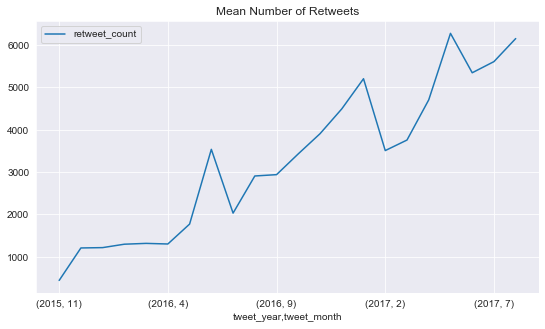

In [253]:
sns.set_style('darkgrid')
display(tweet_mean.head())
tweet_mean.plot(figsize=(9,5), title='Mean Number of Retweets');

retweet_count
tweet_year tweet_month               
2015       11                     296
           12                     365
2016       1                      169
           2                      111
           3                      120

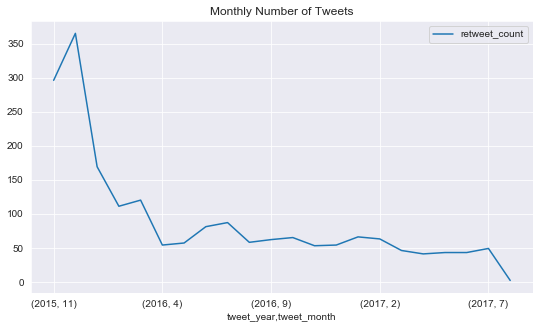

In [254]:
display(tweet_count.head())
tweet_count.plot(figsize=(9,5), title='Monthly Number of Tweets');

## Q2: How does the number of 'favorite count' vary during the first few months? 

In [255]:
favorite_mean = twitter_archive_master.groupby(['tweet_year', 'tweet_month']).mean()[['favorite_count']]

In [256]:
favorite_count = twitter_archive_master.groupby(['tweet_year', 'tweet_month']).count()[['favorite_count']]

favorite_count
tweet_year tweet_month                
2015       11              1088.263514
           12              3011.915068
2016       1               3406.260355
           2               3705.261261
           3               3907.641667

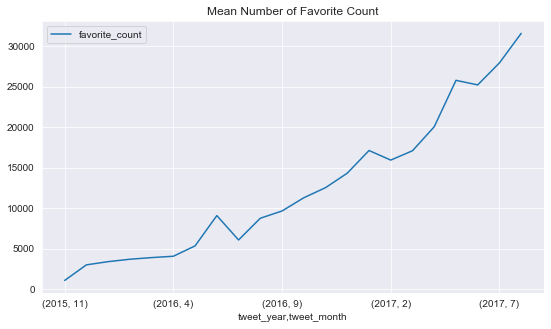

In [257]:
sns.set_style('darkgrid')
display(favorite_mean.head())
favorite_mean.plot(figsize=(9,5), title='Mean Number of Favorite Count');

In [258]:
twitter_archive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'retweet_count', 'favorite_count', 'tweet_month', 'tweet_year',
       'dog_class', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Q3: Can we find any pattern in tweets with high number of 'favorite count'?

In [259]:
top_liked_tweets = twitter_archive_master.sort_values(by='favorite_count', ascending = False).head(100)
with pd.option_context("display.max_columns", None):
    display(top_liked_tweets.head(10))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,tweet_month,tweet_year,dog_class,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
768,744234799360020481,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10,None,70752,144907,6,2016,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
305,822872901745569793,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10,None,39932,124132,1,2017,"puppo,None",https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True
396,807106840509214720,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13.0,10,Stephan,51690,111714,12,2016,None,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,chihuahua,0.505370,True,pomeranian,0.120358,True,toy_terrier,0.077008,True
107,866450705531457537,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13.0,10,Jamesy,30213,108929,5,2017,"pupper,None",https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,french_bulldog,0.905334,True,boston_bull,0.078060,True,pug,0.001771,True
803,739238157791694849,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13.0,10,None,52912,107268,6,2016,doggo,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,eskimo_dog,0.503372,True,siberian_husky,0.390413,True,malamute,0.080901,True
58,879415818425184262,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13.0,10,Duddles,37459,92892,6,2017,None,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,english_springer,0.383404,True,boston_bull,0.134967,True,cardigan,0.110481,True
329,819004803107983360,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14.0,10,Bo,34550,82716,1,2017,doggo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,tibetan_terrier,0.094759,True
134,859196978902773760,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12.0,10,None,26290,80604,5,2017,None,https://pbs.twimg.com/ext_tw_video_thumb/85919...,1,angora,0.224218,False,malamute,0.216163,True,persian_cat,0.128383,False
92,870374049280663552,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13.0,10,Zoey,22754,73972,6,2017,None,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,golden_retriever,0.841001,True,great_pyrenees,0.099278,True,labrador_retriever,0.032621,True
1416,678399652199309312,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This made my day. 12/10 please enjoy https://t...,https://twitter.com/dog_rates/status/678399652...,12.0,10,None,28605,73527,12,2015,None,https://pbs.twimg.com/ext_tw_video_thumb/67839...,1,swing,0.929196,False,bedlington_terrier,0.015047,True,great_pyrenees,0.014039,True


In [260]:
top_liked_tweets.groupby('tweet_year').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_year,,,,,,,,,,,,,,,,,,,,,
2015,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
2016,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
2017,69,69,69,69,69,69,69,69,65,69,...,69,69,69,69,69,69,69,69,69,69
